## Question:
How does human coastal development and fishing activity influence the behavior of sharks, and is there a correlation between increased human presence in shark habitats and the frequency of shark attacks?

## Hypothesis:
We hypothesize that as human invasion and fishing activities intensify in shark habitats, there will be observable changes in shark behavior, potentially leading to an increased frequency of shark attacks. This hypothesis is based on the assumption that alterations in the sharks' natural environment and food sources due to human activities may trigger defensive or predatory behaviors, contributing to a higher incidence of interactions between sharks and humans.

In [1]:
import pandas as pd
url="Data_sharks.xlsx"
shark=pd.read_excel(url,usecols=['Year','Type','Country','State','Activity']).squeeze('columns')
#General cleaning data base
shark.columns=shark.columns.str.lower()
shark.dropna(thresh=5,inplace=True)

# Cleaning

In [2]:
def cleaning(variable,my_dict):
    for key, value in my_dict.items():
        if key in variable:
            return value
    return variable 

#normalizing by activity
activity_cleaning_dict={'bathing':'water activity','swim':'water activity','surf':'water activity',
                        'boarding':'water activity','fishing':'fishing','catching':'fishing','collecting':'work activity',
                        'crabbing':'fishing','dived':'underwater activity','diving':'underwater activity','dragging':'work activity',
                        'feeding':'work activity','fell':'accident','filming':'work activity','floating':'water activity','freediving':'underwater activity',
                        'beach':'water activity','hunting':'fishing','jumped':'water activity','kayaking':'water activity',
                        'kite':'water activity','paddling':'water activity','playing':'water activity','pulling':'work activity',
                        'removing':'work activity','rescuing':'work activity','watching':'underwater activity','siking':'work activity',
                        'sitting':'water activity','skindiving':'underwater activity','smorkeling':'underwater activity','spearfishing':'fishing',
                        'splashing':'water activity','surfing':'water activity','swimming':'water activity','treading':'work activity',
                        'attempting':'work activity','boat':'work activity','cleaning':'work activity','holding':'work activity',
                        'jumping':'water activity','killing':'work activity','lifeguard':'work activity','lifesaving':'work activity',
                        'lying':'water activity','sailing':'water activity','spearing':'underwater activity','standing':'water activity','thouching':'underwater activity',
                        'washing':'water activity','working':'work activity','wreck':'work activity','canoeing':'water activity','clamming':'work activity','dangling feet in the water':'water activity',
                        'paddleskiing':'water activity','sculling':'water activity','snorkeling':'underwater activity','wading':'fishing','watercraft':'water activity','walking':'water activity','air disaster':'accident',
                        'knocked overboard':'accident','sea disaster':'accident','rowing':'water activity','seine netting':'fishing','tagging sharks':'work activity','sup':'water activity'            
}

shark['activity']= shark['activity'].str.lower().str.strip().apply(cleaning,my_dict=activity_cleaning_dict)

#normalizing by type

type_cleaning_dict={'boat':'unprovoked','watercraft':'unprovoked','sea disaster':'unprovoked','questionable':'provoked'}
shark['type']= shark['type'].str.lower().str.strip().apply(cleaning,my_dict=type_cleaning_dict)
#Normalizacion Counstries
shark['country'] = (shark['country'].str.upper().str.replace(' ','_').str.replace('?','').str.replace('&','AND').str.replace('/','AND'))
country_dict={'MEXICO_':'MEXICO','ST_KITTS_AND_NEVIS':'ST_KITTS', 'ST._MARTIN':'ST_MAARTIN',
               'ST_MARTIN': 'ST_MAARTIN','ST._MAARTIN':'ST_MAARTIN'}
shark['country'] = shark['country'].replace(country_dict)

#filter by year
shark=shark[(shark['year']>=1800)]

# Filter 'shark' DataFrame based on the counts of each activity being greater than 3 to simplify activity normalization
activity_counts=shark.activity.value_counts()
shark = shark[shark['activity'].isin(activity_counts[activity_counts > 3].index)]

# Filter 'shark' DataFrame based on the counts of each activity being greater than 3 to simplify activity normalization
type_to_keep = ['unprovoked','provoked','invalid']
shark= shark[shark['type'].isin(type_to_keep)]
#Filter Countries
countries_to_keep = ['USA','AUSTRALIA','SOUTH_AFRICA']
shark_clusters= shark[shark['country'].isin(countries_to_keep)]

# Tables and Analysis

In [3]:
pd.pivot_table(shark,index=('type'),columns='activity',values='year',aggfunc='count')

activity,accident,fishing,underwater activity,water activity,work activity
type,,,,,
invalid,4,84,49,188,25
provoked,1,352,57,67,47
unprovoked,75,882,491,3026,164


In [4]:
# Count occurrences of each country
shark_country = shark['country'].value_counts()

# Calculate percentages using the percentage function
shark_country_percentage = shark_country.apply(lambda x: x / shark_country.sum() * 100)

# Create a DataFrame from the counts and percentages
result = pd.DataFrame({'Count': shark_country, 'Percentage': shark_country_percentage})
result.round(2).head()


,Count,Percentage
country,,
USA,2259,40.98
AUSTRALIA,1254,22.75
SOUTH_AFRICA,521,9.45
NEW_ZEALAND,131,2.38
BRAZIL,101,1.83


In [5]:
# Count occurrences of each country
shark_activity = shark['activity'].value_counts()

# Calculate percentages using the percentage function
shark_activity_percentage = shark_activity.apply(lambda x: x / shark_activity.sum() * 100)

# Create a DataFrame from the counts and percentages
result = pd.DataFrame({'Count': shark_activity, 'Percentage': shark_activity_percentage})
result.round(2).head()

,Count,Percentage
activity,,
water activity,3281,59.52
fishing,1318,23.91
underwater activity,597,10.83
work activity,236,4.28
accident,80,1.45


In [6]:
# Count occurrences of each country
shark_type = shark['type'].value_counts()

# Calculate percentages using the percentage function
shark_type_percentage = shark_type.apply(lambda x: x / shark_type.sum() * 100)

# Create a DataFrame from the counts and percentages
result = pd.DataFrame({'Count': shark_type, 'Percentage': shark_type_percentage})
result.round(2)

,Count,Percentage
type,,
unprovoked,4638,84.14
provoked,524,9.51
invalid,350,6.35


In [24]:
#Creating variables to visualize a pie chart
unprovoked_data = result[result.index == 'unprovoked']
provoked_data = result[result.index == 'provoked']

# Choosing the columns
average_unprovoked = unprovoked_data['Percentage']
average_provoked = provoked_data['Percentage']

# Creating a DataFrame for the chart
average_df = pd.DataFrame({'Type': ['unprovoked', 'provoked'],
                           'Percentage': [average_unprovoked, average_provoked]})

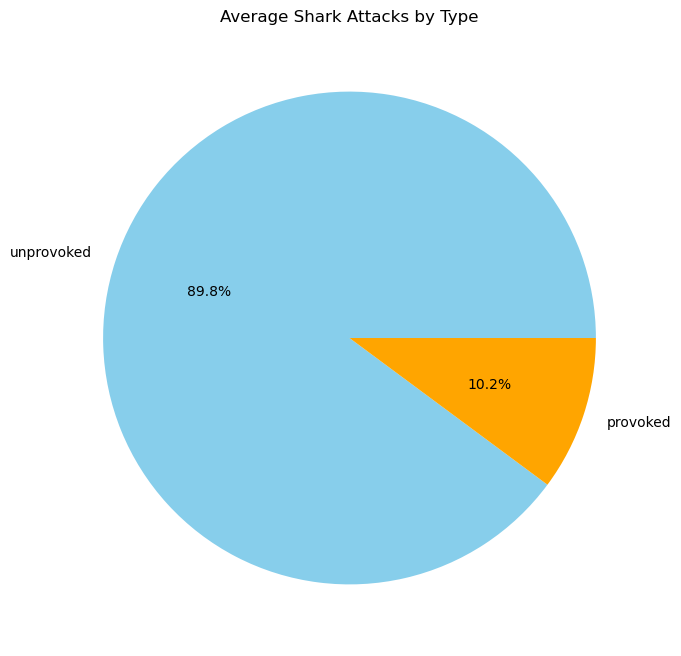

In [25]:
import matplotlib.pyplot as plt

# Plot a pie chart
labels = average_df['Type']
sizes = average_df['Percentage']

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Average Shark Attacks by Type')
plt.show()

In [8]:
#Filters for pivot tableb
a = shark_clusters[['country','activity','type']]
activity = ['water activity', 'fishing', 'underwater activity', 'work activity', 'accident']
pivot_fltr = a[a['activity'].isin(activity)]
pivot_df = pd.pivot_table(pivot_fltr,index=['country','type'], columns='activity', aggfunc =len,fill_value=0)
pivot_df

activity                 accident  fishing  underwater activity  \
country      type                                                 
AUSTRALIA    invalid            1       20                    7   
             provoked           1       80                   12   
             unprovoked        21      196                  165   
SOUTH_AFRICA invalid            0       11                    5   
             provoked           0       32                    8   
             unprovoked         0       99                   25   
USA          invalid            1       29                   22   
             provoked           0      137                   17   
             unprovoked        14      293                  123   

activity                 water activity  work activity  
country      type                                       
AUSTRALIA    invalid                 52              5  
             provoked                18             14  
             unprovoked             638             24  
SOUTH_AFRICA invalid                 21              0  
             provoked                 6              3  
             unprovoked             283             28  
USA          invalid                 83             11  
             provoked                31             20  
             unprovoked            1444             34

# Most Frequent Areas:

In [9]:
#USA Habitat Cluster
shark_usa = shark[shark.country=='USA']
shark_usa = shark_usa['state'].value_counts().head(5)
print(shark_usa) 
#South Africa Habitat Cluster
shark_africa = shark[shark.country=='SOUTH_AFRICA']
shark_africa = shark_africa['state'].value_counts().head(5)
print(shark_africa)
#Australia Habitat Cluster
shark_australia = shark[shark.country=='AUSTRALIA']
shark_australia = shark_australia['state'].value_counts().head(5)
print(shark_australia)

state
Florida           1060
Hawaii             307
California         300
South Carolina     136
North Carolina     106
Name: count, dtype: int64
state
KwaZulu-Natal            184
Western Cape Province    175
Eastern Cape Province    154
Easten Cape Province       2
KNZ                        1
Name: count, dtype: int64
state
New South Wales      451
Queensland           286
Western Australia    197
South Australia      103
Victoria              84
Name: count, dtype: int64


# Attack increase throughout the years

<Axes: xlabel='year', ylabel='Count'>

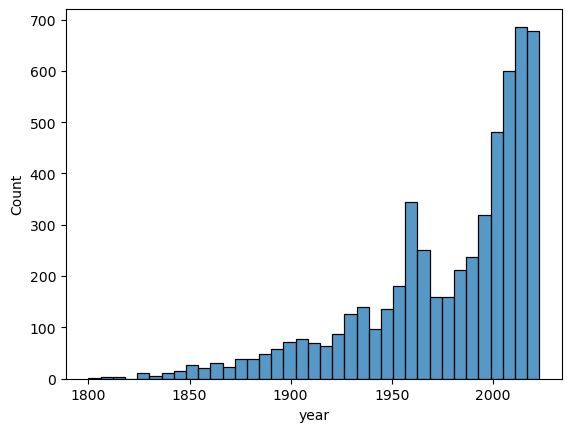

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='year', data=shark, shrink=1)

# Shark Attacks by Activity Over Time

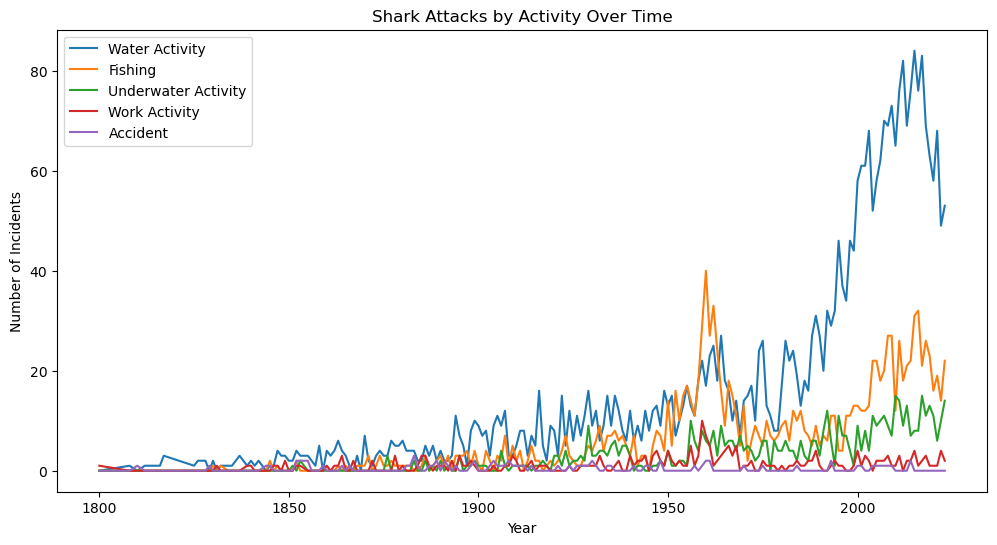

In [11]:
#Time based pivot table
b = shark[['year','activity']]
activity = ['water activity', 'fishing', 'underwater activity', 'work activity', 'accident']
pivot_fltr = b[b['activity'].isin(activity)]
pivot_df = pd.pivot_table(pivot_fltr,index='year', columns='activity', aggfunc =len,fill_value=0)
#Time & Activity Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='water activity', data=pivot_df, label='Water Activity')
sns.lineplot(x='year', y='fishing', data=pivot_df, label='Fishing')
sns.lineplot(x='year', y='underwater activity', data=pivot_df, label='Underwater Activity')
sns.lineplot(x='year', y='work activity', data=pivot_df, label='Work Activity')
sns.lineplot(x='year', y='accident', data=pivot_df, label='Accident')

plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Shark Attacks by Activity Over Time')
plt.legend()
plt.show()